<a href="https://colab.research.google.com/github/DB9653/Bachelorarbeit/blob/main/NSIT_IIITDWD_(TrainGE19_TestH20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/roushan-raj/HASOC-2020/blob/master/Models/German%20Models/German%20Sub-task%20A.ipynb


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'


# Dataset Reading


In [ ]:
import csv
import pandas as pd 
#data = pd.read_excel('/content/hasoc_2020_de_train_new_a.xlsx', converters={'tweet_id':int})
data = pd.read_csv("/content/germeval2019.training_subtask1_2_korrigiert.txt",sep="\t", encoding = "UTF-8", quoting=csv.QUOTE_NONE, names=("text", "task1", "task2"))
pd.set_option('display.max_colwidth',150)
data.head(10)

,text,task1,task2
0,@jouwatch Hat die Polizei keine Kanone mehr ? 20 mal in die Munition laufen lassen und Ruhe ist .,OFFENSE,ABUSE
1,@de_sputnik @Saudi Arabien habt ihr mal wieder einen Orgasmus gebaucht oder weswegen habt ihr die Frau gekillt ? Erzählt mit aber nicht so einen v...,OFFENSE,ABUSE
2,"Glaube ich nicht , die Bundesregierung so wie die Justiz ist so was von Korrupt und arbeiten so fleißig zusammen , das dies nicht erscheinen wird .",OFFENSE,ABUSE
3,""" Doch schockierend viele Jugendliche wissen kaum mehr etwas über den Holocaust. "" Das ist nicht schockierend das ist gut so . Wie sollen junge Me...",OFFENSE,PROFANITY
4,Sein Charakter war ihm wichtiger anstatt als billige Nute für Korrupte Regierungen zu arbeiten .Er hat das Leben begriffen,OFFENSE,PROFANITY
5,"@de_sputnik @JPN_PMO "" Obwohl das US-Militär gemäß dem Sicherheitsvertrag zwischen den USA und Japan das Recht hat Land und Kapazitäten auf dem Te...",OFFENSE,ABUSE
6,"Warum schalten sich die verdammten Schmierenkomödianten nicht dann ein wenn das schiff 40 km vor der Libyschen Küste ist anstatt sie weit auf,s Me...",OFFENSE,PROFANITY
7,"Ob Jesus für das oder jenes Starb ist doch wohl Scheißegal , wir leben im hier und jetzt und sollten versuchen ein vernümftiges Leben auf zu bauen...",OFFENSE,PROFANITY
8,"@de_sputnik Ob Jesus für das oder jenes Starb ist doch wohl Scheißegal , wir leben im hier und jetzt und sollten versuchen ein vernümftiges Leben ...",OFFENSE,PROFANITY
9,"Das ist allerdings wahr , jeder Amerikaner weiß das der Tot Amerika aufgebaut hat und immer weiter versucht auf diese Basis auszubauen.",OFFENSE,ABUSE


In [ ]:
data.shape

(3995, 3)

In [ ]:
print(data.dtypes)

text     object
task1    object
task2    object
dtype: object


# Making of "label" Variable


In [ ]:
label = data['task1']
label.head()

0    OFFENSE
1    OFFENSE
2    OFFENSE
3    OFFENSE
4    OFFENSE
Name: task1, dtype: object

# Checking Dataset Balancing


OTHER      2708
OFFENSE    1287
Name: task1, dtype: int64


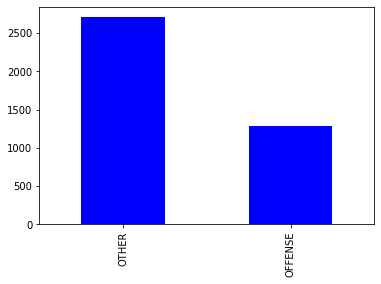

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

# Converting label into "0" or "1"


In [ ]:
import numpy as np
classes_list = ["OFFENSE","OTHER"]
label_index = data['task1'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])



[0 0 0 0 0 0 0 0 0 0]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Making of "text" Variable


In [ ]:
text = data['text']
text.head(10)



0                                                        @jouwatch Hat die Polizei keine Kanone mehr ? 20 mal in die Munition laufen lassen und Ruhe ist .
1    @de_sputnik @Saudi Arabien habt ihr mal wieder einen Orgasmus gebaucht oder weswegen habt ihr die Frau gekillt ? Erzählt mit aber nicht so einen v...
2      Glaube ich nicht , die Bundesregierung so wie die Justiz ist so was von Korrupt und arbeiten so fleißig zusammen , das dies nicht erscheinen wird .
3    " Doch schockierend viele Jugendliche wissen kaum mehr etwas über den Holocaust. " Das ist nicht schockierend das ist gut so . Wie sollen junge Me...
4                               Sein Charakter war ihm wichtiger anstatt als billige Nute für Korrupte Regierungen zu arbeiten .Er hat das Leben begriffen
5    @de_sputnik @JPN_PMO " Obwohl das US-Militär gemäß dem Sicherheitsvertrag zwischen den USA und Japan das Recht hat Land und Kapazitäten auf dem Te...
6    Warum schalten sich die verdammten Schmierenkomödianten nicht dan

# Dataset Pre-processing


In [ ]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [ ]:
text_wo_umlauts = text.apply(lambda x:remove_umlaut(x))
text_wo_umlauts.head(10)

0                                                        @jouwatch Hat die Polizei keine Kanone mehr ? 20 mal in die Munition laufen lassen und Ruhe ist .
1    @de_sputnik @Saudi Arabien habt ihr mal wieder einen Orgasmus gebaucht oder weswegen habt ihr die Frau gekillt ? Erzaehlt mit aber nicht so einen ...
2     Glaube ich nicht , die Bundesregierung so wie die Justiz ist so was von Korrupt und arbeiten so fleissig zusammen , das dies nicht erscheinen wird .
3    " Doch schockierend viele Jugendliche wissen kaum mehr etwas ueber den Holocaust. " Das ist nicht schockierend das ist gut so . Wie sollen junge M...
4                              Sein Charakter war ihm wichtiger anstatt als billige Nute fuer Korrupte Regierungen zu arbeiten .Er hat das Leben begriffen
5    @de_sputnik @JPN_PMO " Obwohl das US-Militaer gemaess dem Sicherheitsvertrag zwischen den USA und Japan das Recht hat Land und Kapazitaeten auf de...
6    Warum schalten sich die verdammten Schmierenkomoedianten nicht da

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text = text_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                                         jouwatch hat die polizei keine kanone mehr   20 mal in die munition laufen lassen und ruhe ist .
1     de sputnik  saudi arabien habt ihr mal wieder einen orgasmus gebaucht oder weswegen habt ihr die frau gekillt   erzaehlt mit aber nicht so einen ...
2     glaube ich nicht , die bundesregierung so wie die justiz ist so was von korrupt und arbeiten so fleissig zusammen , das dies nicht erscheinen wird .
3      doch schockierend viele jugendliche wissen kaum mehr etwas ueber den holocaust.   das ist nicht schockierend das ist gut so . wie sollen junge m...
4                              sein charakter war ihm wichtiger anstatt als billige nute fuer korrupte regierungen zu arbeiten .er hat das leben begriffen
5     de sputnik  jpn pmo   obwohl das us-militaer gemaess dem sicherheitsve rag zwischen den usa und japan das recht hat land und kapazitaeten auf dem...
6    warum schalten sich die verdammten schmierenkomoedianten nicht da

# Removing stopwords


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                                                                                      jouwatch polizei kanone mehr   20 mal munition laufen lassen ruhe .
1     de sputnik  saudi arabien habt mal orgasmus gebaucht weswegen habt frau gekillt   erzaehlt verlogenen scheissdreck bezogen   gemordet luegen seit...
2                                                                        glaube , bundesregierung justiz korrupt arbeiten fleissig zusammen , erscheinen .
3      schockierend viele jugendliche wissen kaum mehr ueber holocaust.   schockierend gut . sollen junge menschen freundschaften juden entwickeln ,wen...
4                                                          charakter wichtiger anstatt billige nute fuer korrupte regierungen arbeiten .er leben begriffen
5     de sputnik  jpn pmo   obwohl us-militaer gemaess sicherheitsve rag usa japan recht land kapazitaeten territorium japans nutzen,   munde zergehen ...
6                                        warum schalten verdammten sch

# Lemmatization

# Stemming

In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head())

0                                                                                      jouwatch polizei kanone mehr   20 mal munition laufen lassen ruhe .
1     de sputnik  saudi arabien habt mal orgasmus gebaucht weswegen habt frau gekillt   erzaehlt verlogenen scheissdreck bezogen   gemordet luegen seit...
2                                                                        glaube , bundesregierung justiz korrupt arbeiten fleissig zusammen , erscheinen .
3      schockierend viele jugendliche wissen kaum mehr ueber holocaust.   schockierend gut . sollen junge menschen freundschaften juden entwickeln ,wen...
4                                                          charakter wichtiger anstatt billige nute fuer korrupte regierungen arbeiten .er leben begriffen
Name: text, dtype: object


# Tokenization using "keras"


In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

# Making Vocab for words


In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

16773


In [ ]:


l = tok_all.word_index
print(l)



{'u': 1, 'lbr': 2, 'fuer': 3, 'ja': 4, 'mal': 5, 'schon': 6, 'mehr': 7, 'heute': 8, 'immer': 9, '0001f602': 10, 'uhr': 11, 'gibt': 12, 'afd': 13, 'menschen': 14, 'geht': 15, 'nicht': 16, 'ueber': 17, 'aachen': 18, 'en': 19, 'ist': 20, 'e': 21, 'deutschland': 22, 'ab': 23, 'spd': 24, 'gut': 25, 'wer': 26, '0001f44b': 27, 'a': 28, 'amp': 29, 'fe0f': 30, 'einfach': 31, 'koennen': 32, 'warum': 33, 'kommt': 34, 'ganz': 35, 'macht': 36, 'pa': 37, 'blockupy': 38, 'stegner': 39, 's': 40, '200d': 41, 'hat': 42, 'seit': 43, 'az': 44, 'merkel': 45, '00': 46, 'sein': 47, '2': 48, 'genau': 49, '1': 50, '30': 51, 'danke': 52, 'wuerde': 53, 'eigentlich': 54, '18': 55, 'lassen': 56, 'deutsche': 57, 'werden': 58, '20': 59, 'muessen': 60, 'hast': 61, 'ralf': 62, 'do': 63, 'eu': 64, 'endlich': 65, 'waere': 66, 'bitte': 67, 'nazis': 68, 'haben': 69, 'frankfu': 70, 'morgen': 71, 'wirklich': 72, 'welt': 73, 'demo': 74, 'cdu': 75, 'wurde': 76, 'sind': 77, 'dafuer': 78, 'bild': 79, 'tag': 80, 'gar': 81, 'frau

# encoding or sequencing


In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])

 jouwatch polizei kanone mehr   20 mal munition laufen lassen ruhe .
[174, 130, 6387, 7, 59, 5, 3922, 603, 56, 846]


# Pre-padding


In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Reading Test data and Pre-processing


In [ ]:
data_t = pd.read_csv("/content/hasoc20test_improved.csv", converters={'tweet_id':int})

pd.set_option('display.max_colwidth',150)
data_t.head(10)

data_t['task1'] = data_t['task1'].str.replace('NOT', 'OTHER')
data_t

data_t['task1'] = data_t['task1'].str.replace('HOF', 'OFFENSE')
data_t

data_t = data_t.drop(["Unnamed: 0"], axis = 1)

In [ ]:
data_t.shape

(526, 5)

In [ ]:
print(data_t.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


In [ ]:


label_t = data_t['task1']
label_t.head()



0    OTHER
1    OTHER
2    OTHER
3    OTHER
4    OTHER
Name: task1, dtype: object

OTHER      365
OFFENSE    161
Name: task1, dtype: int64


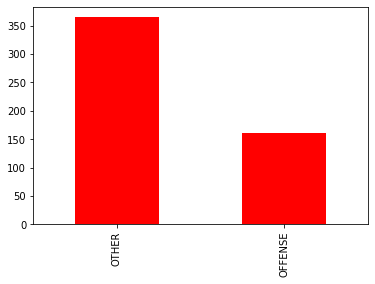

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

In [ ]:


import numpy as np
classes_list_t = ["OFFENSE","OTHER"]
label_t_index = data_t['task1'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])



[1 1 1 1 1 0 0 1 1 1]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)



In [ ]:
print(label_twoDimension_t[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:


text_t = data_t['text']
text_t.head(10)



0                                                                                                  @derCarsti Boykottieren hört sich besser an. 💙💙
1    RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Brüssel übernimmt.\nWäre es so, wie schätzen Sie dann die Zukunft der Mitgliedstaaten…
2                             Hat #Hitler wirklich den Krieg in der Wüste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.
3     RT @Beatrix_vStorch: #May tritt in UK unter Tränen zurück. Wenn #Merkel zurücktritt, dann auch unter Tränen – unter den Freudentränen von M…
4                                                     @justmeDoro Eher nicht. Das Gänse hauen wieder ab in ihre warmen Überwinterungsquartiere. 😅😂
5     RT @VonSchwer: Ein guter Patriot geht von Bord‼️Gestürzt durch einen, vom ZDF finanzierten, linken Schmierenkomödianten 😡‼️ https://t.co/rl…
6                     @yooli_derechte @MontanaBlack Mich wundert es echt wie du noch keine Cockschelle bekommen hast. 

In [ ]:
test_wo_umlauts = text_t.apply(lambda x: remove_umlaut(x))

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text_t = test_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                                                                                                      dercarsti boykottieren hoe  sich besser an.   
1         ibikus31: es wird spekulie , ob merkel ein amt in bruessel uebernimmt. waere es so, wie schaetzen sie dann die zukunft der mitgliedstaaten 
2                                hat  hitler wirklich den krieg in der wueste verloren  nach der  welt schlagzeile hat die  tagesschau nicht reagie .
3       beatrix vstorch:  may tritt in uk unter traenen zurueck. wenn  merkel zuruecktritt, dann auch unter traenen   unter den freudentraenen von m 
4                                                        justmedoro eher nicht. das gaense hauen wieder ab in ihre warmen ueberwinterungsqua iere.   
5                          vonschwer: ein guter patriot geht von bord  gestuerzt durch einen, vom zdf finanzie en, linken schmierenkomoedianten      
6                          yooli derechte  montanablack mich wunde  es echt wie du noch keine cocksc

In [ ]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                                                dercarsti boykottieren hoe  besser an.   
1                        ibikus31: spekulie , merkel amt bruessel uebernimmt. waere so, schaetzen zukunft mitgliedstaaten 
2                                            hitler wirklich krieg wueste verloren   welt schlagzeile  tagesschau reagie .
3                        beatrix vstorch:  may tritt uk traenen zurueck.  merkel zuruecktritt, traenen   freudentraenen m 
4                                                justmedoro eher nicht. gaense hauen ab warmen ueberwinterungsqua iere.   
5                 vonschwer: guter patriot geht bord  gestuerzt einen, zdf finanzie en, linken schmierenkomoedianten      
6                            yooli derechte  montanablack wunde  echt cockschelle bekommen hast. kinderfickender hurensohn
7                                                                                spd  kuehne  ende  nahles einfach dumm:  
8               

# Stemming

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                                                dercarsti boykottieren hoe  besser an.   
1                        ibikus31: spekulie , merkel amt bruessel uebernimmt. waere so, schaetzen zukunft mitgliedstaaten 
2                                            hitler wirklich krieg wueste verloren   welt schlagzeile  tagesschau reagie .
3                        beatrix vstorch:  may tritt uk traenen zurueck.  merkel zuruecktritt, traenen   freudentraenen m 
4                                                justmedoro eher nicht. gaense hauen ab warmen ueberwinterungsqua iere.   
5                 vonschwer: guter patriot geht bord  gestuerzt einen, zdf finanzie en, linken schmierenkomoedianten      
6                            yooli derechte  montanablack wunde  echt cockschelle bekommen hast. kinderfickender hurensohn
7                                                                                spd  kuehne  ende  nahles einfach dumm:  
8               

In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)



In [ ]:


vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)



2687


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'einfach': 1, 'deutsche': 2, 'arsch': 3, 'merkel': 4, 'fuer': 5, 'schon': 6, 'gruenen': 7, 'scheiss': 8, 'gt': 9, 'ab': 10, 'mal': 11, 'halt': 12, 'linken': 13, 'dumm': 14, 'porno': 15, 'welt': 16, 'hurensohn': 17, 'immer': 18, 'nazis': 19, 'frau': 20, 'mehr': 21, 'scheisse': 22, 'frauen': 23, 'ja': 24, 'zurueck': 25, 'gratis': 26, 'echt': 27, 'gruene': 28, 'warum': 29, 'tagesschau': 30, 'islam': 31, 'gibt': 32, 'en': 33, 'kinder': 34, 'ficken': 35, 'pack': 36, 'heute': 37, 'idioten': 38, 'ueber': 39, 'hoe': 40, 'besser': 41, 'lange': 42, 'eu': 43, 'dumme': 44, 'e': 45, 'schulz': 46, '3': 47, 'linke': 48, 'wuerde': 49, 'erst': 50, 'leben': 51, 'bild': 52, 'europa': 53, 'ist': 54, 'kopf': 55, 's': 56, 'kurz': 57, '5': 58, '12': 59, 'hasse': 60, 'deutschland': 61, 'eigentlich': 62, 'fresse': 63, 'b': 64, 'gabriel': 65, 'neue': 66, 'an': 67, 'waere': 68, 'eher': 69, 'nicht': 70, 'ganzen': 71, 'lassen': 72, 'a': 73, 'grund': 74, 'kotzen': 75, 'de': 76, 'dummen': 77, 'ma': 78, 'afd': 79, '

In [ ]:


encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])



 dercarsti boykottieren hoe  besser an.   
[13395, 875, 103, 133]


In [ ]:


from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')



# FastText Embeddings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gunzip /content/drive/MyDrive/cc.de.300.vec.gz

gzip: /content/drive/MyDrive/cc.de.300.vec.gz: No such file or directory


In [ ]:
# https://stackoverflow.com/questions/69964788/how-to-unzip-gz-file-using-google-colab

# FastText Embedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('/content/drive/MyDrive/cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 2000000 word vectors.


In [ ]:


embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector



# CNN 1 Model


In [ ]:


from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq



In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:
CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(2,activation="sigmoid")
                       ])



In [ ]:
CNN1_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          5032200   
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          115328    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

In [ ]:
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
from tensorflow.keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN2_model_Train_GERMEVAL2019_Test_GERMEVAL2018_Task_A.png', show_shapes=True, show_layer_names=True)

from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



In [ ]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



# Model Fitting or Training


In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
123/125 [============================>.] - ETA: 0s - loss: 0.6583 - accuracy: 0.6690

125/125 [==============================] - 13s 7ms/step - loss: 0.6576 - accuracy: 0.6693 - lr: 3.0000e-05
Epoch 2/200
121/125 [============================>.] - ETA: 0s - loss: 0.6274 - accuracy: 0.6779

125/125 [==============================] - 1s 7ms/step - loss: 0.6269 - accuracy: 0.6778 - lr: 3.0000e-05
Epoch 3/200
121/125 [============================>.] - ETA: 0s - loss: 0.6183 - accuracy: 0.6808

125/125 [==============================] - 1s 7ms/step - loss: 0.6200 - accuracy: 0.6778 - lr: 3.0000e-05
Epoch 4/200
120/125 [===========================>..] - ETA: 0s - loss: 0.6128 - accuracy: 0.6784

125/125 [==============================] - 1s 7ms/step - loss: 0.6133 - accuracy: 0.6778 - lr: 3.0000e-05
Epoch 5/200
120/125 [===========================>..] - ETA: 0s - loss: 0.6091 - accuracy: 0.6773

125/125 [==============================] - 1s 7ms/step - loss: 0.6083 - accuracy: 0.6778 - lr: 3.0000e-05
Epoch 6/200
122/125 [============================>.] - ETA: 0s - loss: 0.6000 - accuracy: 0.6780

125/125 [==============================] - 1s 7ms/step - loss: 0.5999 - accuracy: 0.6783 - lr: 3.0000e-05
Epoch 7/200
120/125 [===========================>..] - ETA: 0s - loss: 0.5894 - accuracy: 0.6771

125/125 [==============================] - 1s 7ms/step - loss: 0.5882 - accuracy: 0.6786 - lr: 3.0000e-05
Epoch 8/200
121/125 [============================>.] - ETA: 0s - loss: 0.5757 - accuracy: 0.6826

125/125 [==============================] - 1s 7ms/step - loss: 0.5749 - accuracy: 0.6836 - lr: 3.0000e-05
Epoch 9/200
120/125 [===========================>..] - ETA: 0s - loss: 0.5552 - accuracy: 0.6987

125/125 [==============================] - 1s 7ms/step - loss: 0.5541 - accuracy: 0.6999 - lr: 3.0000e-05
Epoch 10/200
120/125 [===========================>..] - ETA: 0s - loss: 0.5292 - accuracy: 0.7273

125/125 [==============================] - 1s 7ms/step - loss: 0.5281 - accuracy: 0.7302 - lr: 3.0000e-05
Epoch 11/200
120/125 [===========================>..] - ETA: 0s - loss: 0.4974 - accuracy: 0.7602

125/125 [==============================] - 1s 7ms/step - loss: 0.4952 - accuracy: 0.7640 - lr: 3.0000e-05
Epoch 12/200
120/125 [===========================>..] - ETA: 0s - loss: 0.4514 - accuracy: 0.8055

125/125 [==============================] - 1s 7ms/step - loss: 0.4544 - accuracy: 0.8038 - lr: 3.0000e-05
Epoch 13/200
121/125 [============================>.] - ETA: 0s - loss: 0.4067 - accuracy: 0.8510

125/125 [==============================] - 1s 7ms/step - loss: 0.4053 - accuracy: 0.8523 - lr: 3.0000e-05
Epoch 14/200
121/125 [============================>.] - ETA: 0s - loss: 0.3566 - accuracy: 0.8807

125/125 [==============================] - 1s 7ms/step - loss: 0.3551 - accuracy: 0.8819 - lr: 3.0000e-05
Epoch 15/200
120/125 [===========================>..] - ETA: 0s - loss: 0.3047 - accuracy: 0.9104

125/125 [==============================] - 1s 7ms/step - loss: 0.3035 - accuracy: 0.9114 - lr: 3.0000e-05
Epoch 16/200
120/125 [===========================>..] - ETA: 0s - loss: 0.2588 - accuracy: 0.9289

125/125 [==============================] - 1s 7ms/step - loss: 0.2597 - accuracy: 0.9282 - lr: 3.0000e-05
Epoch 17/200
120/125 [===========================>..] - ETA: 0s - loss: 0.2177 - accuracy: 0.9445

125/125 [==============================] - 1s 7ms/step - loss: 0.2160 - accuracy: 0.9452 - lr: 3.0000e-05
Epoch 18/200
120/125 [===========================>..] - ETA: 0s - loss: 0.1788 - accuracy: 0.9563

125/125 [==============================] - 1s 7ms/step - loss: 0.1817 - accuracy: 0.9542 - lr: 3.0000e-05
Epoch 19/200
120/125 [===========================>..] - ETA: 0s - loss: 0.1528 - accuracy: 0.9680

125/125 [==============================] - 1s 7ms/step - loss: 0.1522 - accuracy: 0.9687 - lr: 3.0000e-05
Epoch 20/200
119/125 [===========================>..] - ETA: 0s - loss: 0.1268 - accuracy: 0.9722

125/125 [==============================] - 1s 7ms/step - loss: 0.1264 - accuracy: 0.9732 - lr: 3.0000e-05
Epoch 21/200
121/125 [============================>.] - ETA: 0s - loss: 0.1065 - accuracy: 0.9806

125/125 [==============================] - 1s 7ms/step - loss: 0.1065 - accuracy: 0.9807 - lr: 3.0000e-05
Epoch 22/200
118/125 [===========================>..] - ETA: 0s - loss: 0.0913 - accuracy: 0.9844

125/125 [==============================] - 1s 7ms/step - loss: 0.0910 - accuracy: 0.9840 - lr: 3.0000e-05
Epoch 23/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0735 - accuracy: 0.9893

125/125 [==============================] - 1s 7ms/step - loss: 0.0735 - accuracy: 0.9892 - lr: 3.0000e-05
Epoch 24/200
118/125 [===========================>..] - ETA: 0s - loss: 0.0644 - accuracy: 0.9907

125/125 [==============================] - 1s 7ms/step - loss: 0.0650 - accuracy: 0.9900 - lr: 3.0000e-05
Epoch 25/200
124/125 [============================>.] - ETA: 0s - loss: 0.0539 - accuracy: 0.9927

125/125 [==============================] - 1s 7ms/step - loss: 0.0537 - accuracy: 0.9927 - lr: 3.0000e-05
Epoch 26/200
121/125 [============================>.] - ETA: 0s - loss: 0.0474 - accuracy: 0.9925

125/125 [==============================] - 1s 7ms/step - loss: 0.0475 - accuracy: 0.9925 - lr: 3.0000e-05
Epoch 27/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0402 - accuracy: 0.9948

125/125 [==============================] - 1s 7ms/step - loss: 0.0399 - accuracy: 0.9950 - lr: 3.0000e-05
Epoch 28/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0348 - accuracy: 0.9951

125/125 [==============================] - 1s 7ms/step - loss: 0.0348 - accuracy: 0.9952 - lr: 3.0000e-05
Epoch 29/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0315 - accuracy: 0.9966

125/125 [==============================] - 1s 7ms/step - loss: 0.0309 - accuracy: 0.9967 - lr: 3.0000e-05
Epoch 30/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0263 - accuracy: 0.9971

125/125 [==============================] - 1s 7ms/step - loss: 0.0263 - accuracy: 0.9972 - lr: 3.0000e-05
Epoch 31/200
118/125 [===========================>..] - ETA: 0s - loss: 0.0225 - accuracy: 0.9971

125/125 [==============================] - 1s 7ms/step - loss: 0.0223 - accuracy: 0.9972 - lr: 3.0000e-05
Epoch 32/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0186 - accuracy: 0.9987

125/125 [==============================] - 1s 7ms/step - loss: 0.0189 - accuracy: 0.9985 - lr: 3.0000e-05
Epoch 33/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0175 - accuracy: 0.9982

125/125 [==============================] - 1s 7ms/step - loss: 0.0174 - accuracy: 0.9982 - lr: 3.0000e-05
Epoch 34/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0152 - accuracy: 0.9982

125/125 [==============================] - 1s 7ms/step - loss: 0.0155 - accuracy: 0.9982 - lr: 3.0000e-05
Epoch 35/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0129 - accuracy: 0.9992

125/125 [==============================] - 1s 7ms/step - loss: 0.0128 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 36/200
118/125 [===========================>..] - ETA: 0s - loss: 0.0112 - accuracy: 0.9995

125/125 [==============================] - 1s 7ms/step - loss: 0.0115 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 37/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0101 - accuracy: 0.9995

125/125 [==============================] - 1s 7ms/step - loss: 0.0100 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 38/200
121/125 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9997

125/125 [==============================] - 1s 7ms/step - loss: 0.0085 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 39/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0084 - accuracy: 0.9995

125/125 [==============================] - 1s 7ms/step - loss: 0.0084 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 40/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0074 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0072 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 41/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0068 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 42/200
121/125 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0057 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 43/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0052 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 44/200
121/125 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0045 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 45/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0044 - accuracy: 0.9997

125/125 [==============================] - 1s 7ms/step - loss: 0.0044 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 46/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0039 - accuracy: 0.9997

125/125 [==============================] - 1s 7ms/step - loss: 0.0039 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 47/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0035 - accuracy: 0.9997

125/125 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 48/200
121/125 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 49/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0027 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 50/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0025 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 51/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0024 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 52/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 53/200
118/125 [===========================>..] - ETA: 0s - loss: 0.0022 - accuracy: 0.9997

125/125 [==============================] - 1s 7ms/step - loss: 0.0022 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 54/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 55/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 56/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 57/200
120/125 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 58/200
121/125 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 59/200
119/125 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 60/200
118/125 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 61/200
119/125 [===========================>..] - ETA: 0s - loss: 9.9623e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 9.9802e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 62/200
122/125 [============================>.] - ETA: 0s - loss: 8.6372e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.5856e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 63/200
119/125 [===========================>..] - ETA: 0s - loss: 9.8682e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 9.7046e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 64/200
120/125 [===========================>..] - ETA: 0s - loss: 7.4970e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 7.4515e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 65/200
118/125 [===========================>..] - ETA: 0s - loss: 6.9544e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 6.7935e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 66/200
118/125 [===========================>..] - ETA: 0s - loss: 5.6643e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.6406e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 67/200
124/125 [============================>.] - ETA: 0s - loss: 5.7730e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.7701e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 68/200
121/125 [============================>.] - ETA: 0s - loss: 5.6291e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.5635e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 69/200
120/125 [===========================>..] - ETA: 0s - loss: 6.5691e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 6.5058e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 70/200
120/125 [===========================>..] - ETA: 0s - loss: 5.1658e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.0514e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 71/200
120/125 [===========================>..] - ETA: 0s - loss: 5.2172e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.3922e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 72/200
120/125 [===========================>..] - ETA: 0s - loss: 4.2199e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 4.1983e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 73/200
120/125 [===========================>..] - ETA: 0s - loss: 3.2924e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.2559e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 74/200
120/125 [===========================>..] - ETA: 0s - loss: 3.4227e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.4793e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 75/200
121/125 [============================>.] - ETA: 0s - loss: 3.1722e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.1207e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 76/200
120/125 [===========================>..] - ETA: 0s - loss: 2.8819e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.8455e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 77/200
120/125 [===========================>..] - ETA: 0s - loss: 3.1600e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.1532e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 78/200
118/125 [===========================>..] - ETA: 0s - loss: 2.7674e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.7798e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 79/200
121/125 [============================>.] - ETA: 0s - loss: 3.3827e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.4238e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 80/200
119/125 [===========================>..] - ETA: 0s - loss: 2.7670e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.7153e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 81/200
120/125 [===========================>..] - ETA: 0s - loss: 2.1556e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.1640e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 82/200
120/125 [===========================>..] - ETA: 0s - loss: 2.2504e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.2147e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 83/200
118/125 [===========================>..] - ETA: 0s - loss: 1.8827e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.8634e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 84/200
125/125 [==============================] - ETA: 0s - loss: 1.5739e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.5739e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 85/200
125/125 [==============================] - ETA: 0s - loss: 1.4751e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.4751e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 86/200
121/125 [============================>.] - ETA: 0s - loss: 1.4921e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 8ms/step - loss: 1.4789e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 87/200
118/125 [===========================>..] - ETA: 0s - loss: 1.1318e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.1507e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 88/200
120/125 [===========================>..] - ETA: 0s - loss: 1.2676e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.2579e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 89/200
121/125 [============================>.] - ETA: 0s - loss: 1.1889e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.1679e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 90/200
125/125 [==============================] - ETA: 0s - loss: 1.0603e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.0603e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 91/200
120/125 [===========================>..] - ETA: 0s - loss: 1.1890e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.1647e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 92/200
120/125 [===========================>..] - ETA: 0s - loss: 9.8543e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 9.6831e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 93/200
118/125 [===========================>..] - ETA: 0s - loss: 9.4837e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 9.1507e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 94/200
121/125 [============================>.] - ETA: 0s - loss: 1.3194e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.4934e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 95/200
121/125 [============================>.] - ETA: 0s - loss: 1.0593e-04 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.0768e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 96/200
121/125 [============================>.] - ETA: 0s - loss: 8.6456e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.4951e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 97/200
125/125 [==============================] - ETA: 0s - loss: 6.3956e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 6.3956e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 98/200
120/125 [===========================>..] - ETA: 0s - loss: 6.2037e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 6.1721e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 99/200
119/125 [===========================>..] - ETA: 0s - loss: 6.3972e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 6.2628e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 100/200
119/125 [===========================>..] - ETA: 0s - loss: 5.6840e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.6075e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 101/200
119/125 [===========================>..] - ETA: 0s - loss: 5.1943e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.1930e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 102/200
124/125 [============================>.] - ETA: 0s - loss: 4.2768e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 9ms/step - loss: 4.3046e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 103/200
121/125 [============================>.] - ETA: 0s - loss: 4.7991e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 9ms/step - loss: 4.7363e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 104/200
123/125 [============================>.] - ETA: 0s - loss: 4.9279e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 10ms/step - loss: 4.8781e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 105/200
123/125 [============================>.] - ETA: 0s - loss: 3.6285e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 10ms/step - loss: 3.6034e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 106/200
124/125 [============================>.] - ETA: 0s - loss: 3.3240e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 10ms/step - loss: 3.3091e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 107/200
120/125 [===========================>..] - ETA: 0s - loss: 3.9423e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 9ms/step - loss: 3.9655e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 108/200
119/125 [===========================>..] - ETA: 0s - loss: 2.3554e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.3942e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 109/200
120/125 [===========================>..] - ETA: 0s - loss: 4.2086e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 4.1166e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 110/200
119/125 [===========================>..] - ETA: 0s - loss: 5.3802e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.2266e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 111/200
119/125 [===========================>..] - ETA: 0s - loss: 3.7202e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.6749e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 112/200
120/125 [===========================>..] - ETA: 0s - loss: 2.7335e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.0575e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 113/200
119/125 [===========================>..] - ETA: 0s - loss: 2.9949e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.0030e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 114/200
125/125 [==============================] - ETA: 0s - loss: 2.4711e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.4711e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 115/200
120/125 [===========================>..] - ETA: 0s - loss: 2.3435e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.3124e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 116/200
125/125 [==============================] - ETA: 0s - loss: 5.8252e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.8252e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 117/200
118/125 [===========================>..] - ETA: 0s - loss: 2.9090e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.8372e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 118/200
125/125 [==============================] - ETA: 0s - loss: 1.5358e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.5358e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 119/200
119/125 [===========================>..] - ETA: 0s - loss: 1.5387e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.6236e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 120/200
119/125 [===========================>..] - ETA: 0s - loss: 1.5521e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.5941e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 121/200
118/125 [===========================>..] - ETA: 0s - loss: 1.6464e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.5998e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 122/200
125/125 [==============================] - ETA: 0s - loss: 1.7182e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.7182e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 123/200
125/125 [==============================] - ETA: 0s - loss: 1.0779e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.0779e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 124/200
119/125 [===========================>..] - ETA: 0s - loss: 1.3302e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.3026e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 125/200
118/125 [===========================>..] - ETA: 0s - loss: 1.0048e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 9.8148e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 126/200
125/125 [==============================] - ETA: 0s - loss: 1.1266e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.1266e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 127/200
120/125 [===========================>..] - ETA: 0s - loss: 8.8286e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.6615e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 128/200
118/125 [===========================>..] - ETA: 0s - loss: 7.8404e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.0165e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 129/200
119/125 [===========================>..] - ETA: 0s - loss: 9.7905e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 9.5294e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 130/200
123/125 [============================>.] - ETA: 0s - loss: 8.1546e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.3440e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 131/200
124/125 [============================>.] - ETA: 0s - loss: 7.1999e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 7.1657e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 132/200
120/125 [===========================>..] - ETA: 0s - loss: 7.0492e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 6.8435e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 133/200
125/125 [==============================] - ETA: 0s - loss: 8.0238e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.0238e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 134/200
119/125 [===========================>..] - ETA: 0s - loss: 9.8145e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 9.5608e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 135/200
125/125 [==============================] - ETA: 0s - loss: 8.2979e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.2979e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 136/200
118/125 [===========================>..] - ETA: 0s - loss: 5.0114e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 4.8752e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 137/200
120/125 [===========================>..] - ETA: 0s - loss: 1.9063e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.8546e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 138/200
118/125 [===========================>..] - ETA: 0s - loss: 1.0367e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.0080e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 139/200
118/125 [===========================>..] - ETA: 0s - loss: 1.3286e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.2715e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 140/200
125/125 [==============================] - ETA: 0s - loss: 4.4928e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 4.4928e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 141/200
124/125 [============================>.] - ETA: 0s - loss: 5.2936e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.2912e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 142/200
120/125 [===========================>..] - ETA: 0s - loss: 7.1782e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 6.9728e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 143/200
121/125 [============================>.] - ETA: 0s - loss: 1.1623e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.1302e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 144/200
120/125 [===========================>..] - ETA: 0s - loss: 4.7815e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 4.7507e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 145/200
125/125 [==============================] - ETA: 0s - loss: 3.5939e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.5939e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 146/200
118/125 [===========================>..] - ETA: 0s - loss: 3.7071e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.6029e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 147/200
124/125 [============================>.] - ETA: 0s - loss: 3.2728e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.2581e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 148/200
118/125 [===========================>..] - ETA: 0s - loss: 2.8995e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.8761e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 149/200
125/125 [==============================] - ETA: 0s - loss: 2.9417e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.9417e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 150/200
125/125 [==============================] - ETA: 0s - loss: 2.7513e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.7513e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 151/200
118/125 [===========================>..] - ETA: 0s - loss: 3.9878e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 4.0854e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 152/200
124/125 [============================>.] - ETA: 0s - loss: 3.5499e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.5436e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 153/200
118/125 [===========================>..] - ETA: 0s - loss: 2.4227e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.4310e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 154/200
119/125 [===========================>..] - ETA: 0s - loss: 1.9938e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.0253e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 155/200
125/125 [==============================] - ETA: 0s - loss: 2.3388e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.3388e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 156/200
123/125 [============================>.] - ETA: 0s - loss: 2.3158e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.2940e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 157/200
118/125 [===========================>..] - ETA: 0s - loss: 2.1651e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.1107e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 158/200
118/125 [===========================>..] - ETA: 0s - loss: 1.8258e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.7902e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 159/200
121/125 [============================>.] - ETA: 0s - loss: 4.7922e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 4.6710e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 160/200
125/125 [==============================] - ETA: 0s - loss: 1.9671e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.9671e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 161/200
118/125 [===========================>..] - ETA: 0s - loss: 1.6577e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.6098e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 162/200
120/125 [===========================>..] - ETA: 0s - loss: 1.7481e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.7221e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 163/200
118/125 [===========================>..] - ETA: 0s - loss: 1.6633e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.6320e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 164/200
119/125 [===========================>..] - ETA: 0s - loss: 2.4904e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.4087e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 165/200
120/125 [===========================>..] - ETA: 0s - loss: 1.1892e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.1735e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 166/200
125/125 [==============================] - ETA: 0s - loss: 1.1933e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.1933e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 167/200
125/125 [==============================] - ETA: 0s - loss: 7.3798e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 7.3798e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 168/200
119/125 [===========================>..] - ETA: 0s - loss: 1.1947e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.1603e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 169/200
124/125 [============================>.] - ETA: 0s - loss: 1.2581e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.2521e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 170/200
118/125 [===========================>..] - ETA: 0s - loss: 1.3335e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.2864e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 171/200
124/125 [============================>.] - ETA: 0s - loss: 9.5480e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 9.5229e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 172/200
119/125 [===========================>..] - ETA: 0s - loss: 2.4269e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.3848e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 173/200
118/125 [===========================>..] - ETA: 0s - loss: 9.7584e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 9.6644e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 174/200
124/125 [============================>.] - ETA: 0s - loss: 7.9057e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 7.8615e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 175/200
122/125 [============================>.] - ETA: 0s - loss: 5.7195e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.8729e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 176/200
121/125 [============================>.] - ETA: 0s - loss: 7.8829e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.0827e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 177/200
123/125 [============================>.] - ETA: 0s - loss: 7.5472e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 7.4713e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 178/200
124/125 [============================>.] - ETA: 0s - loss: 1.3245e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.3158e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 179/200
125/125 [==============================] - ETA: 0s - loss: 1.6396e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.6396e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 180/200
123/125 [============================>.] - ETA: 0s - loss: 8.9602e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.8629e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 181/200
125/125 [==============================] - ETA: 0s - loss: 5.0169e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.0169e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 182/200
119/125 [===========================>..] - ETA: 0s - loss: 5.7082e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.4215e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 183/200
124/125 [============================>.] - ETA: 0s - loss: 1.3185e-05 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.3097e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 184/200
124/125 [============================>.] - ETA: 0s - loss: 2.1473e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.1392e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 185/200
124/125 [============================>.] - ETA: 0s - loss: 1.0623e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.0852e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 186/200
124/125 [============================>.] - ETA: 0s - loss: 1.0540e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.0533e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 187/200
118/125 [===========================>..] - ETA: 0s - loss: 1.0462e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.0265e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 188/200
125/125 [==============================] - ETA: 0s - loss: 6.7110e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 6.7110e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 189/200
120/125 [===========================>..] - ETA: 0s - loss: 5.1136e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.0511e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 190/200
121/125 [============================>.] - ETA: 0s - loss: 1.1530e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 1.1546e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 191/200
123/125 [============================>.] - ETA: 0s - loss: 2.5887e-06 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 2.5709e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 192/200
124/125 [============================>.] - ETA: 0s - loss: 7.1259e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 7.1394e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 193/200
124/125 [============================>.] - ETA: 0s - loss: 6.1771e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 6.4524e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 194/200
125/125 [==============================] - ETA: 0s - loss: 4.6852e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 4.6852e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 195/200
124/125 [============================>.] - ETA: 0s - loss: 4.6440e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 4.6153e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 196/200
119/125 [===========================>..] - ETA: 0s - loss: 4.3396e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 4.3152e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 197/200
120/125 [===========================>..] - ETA: 0s - loss: 7.5571e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 7.2997e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 198/200
125/125 [==============================] - ETA: 0s - loss: 3.9216e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 3.9216e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 199/200
123/125 [============================>.] - ETA: 0s - loss: 5.1993e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 5.1342e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 200/200
125/125 [==============================] - ETA: 0s - loss: 8.5697e-07 - accuracy: 1.0000

125/125 [==============================] - 1s 7ms/step - loss: 8.5697e-07 - accuracy: 1.0000 - lr: 3.0000e-05


# log loss

In [ ]:
CNN1_network_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_network_predictions)
log_loss_test

2.612916594524118

# Classification Report


In [ ]:
predictions = np.zeros_like(CNN1_network_predictions)
predictions[np.arange(len(CNN1_network_predictions)), CNN1_network_predictions.argmax(1)] = 1



In [ ]:


predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger



array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:


pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)



     task1
0        1
1        0
2        1
3        1
4        1
..     ...
521      1
522      0
523      1
524      1
525      1

[526 rows x 1 columns]


In [ ]:
df.to_csv("NSIT_Train_GERMEVAL2019_Test_HASOC2020_Task_A_submission_DE_A.csv", index=False)

In [ ]:


from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))



              precision    recall  f1-score   support

           0       0.44      0.59      0.50       161
           1       0.79      0.67      0.72       365

   micro avg       0.64      0.64      0.64       526
   macro avg       0.61      0.63      0.61       526
weighted avg       0.68      0.64      0.65       526
 samples avg       0.64      0.64      0.64       526



# Epoch v/s Loss Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

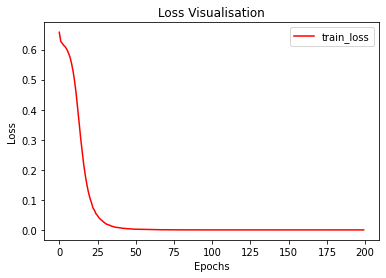

In [ ]:


from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_Train_GERMEVAL2019_Test_HASOC2020_Task_A_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_Train_GERMEVAL2019_Test_HASOC2020_Task_A_Ger_lossPlot.pdf') 



# Epoch v/s Accuracy Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

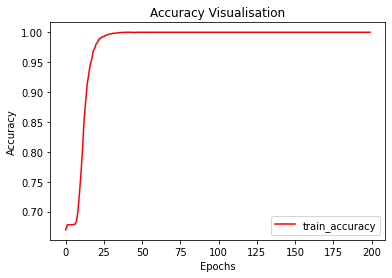

In [ ]:


plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_Train_GERMEVAL2019_Test_HASOC2020_Task_A_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_Train_GERMEVAL2019_Test_HASOC2020_Task_A_Ger_accuracyPlot.pdf') 



# Area under Curve-ROC


In [ ]:


pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)



In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_Train_GERMEVAL2019_Test_HASOC2020_Task_A_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_Train_GERMEVAL2019_Test_HASOC2020_Task_A_Ger_Area_RocPlot.pdf')

  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

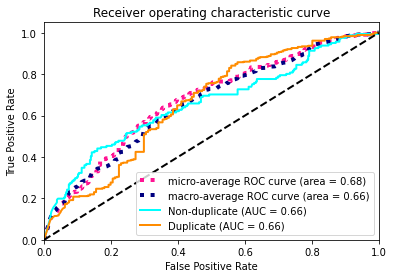

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)